<a href="https://colab.research.google.com/github/PedroOlavo/ArtigosMedium/blob/main/Airbnb_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados do Airbnb na capital italiana, Roma

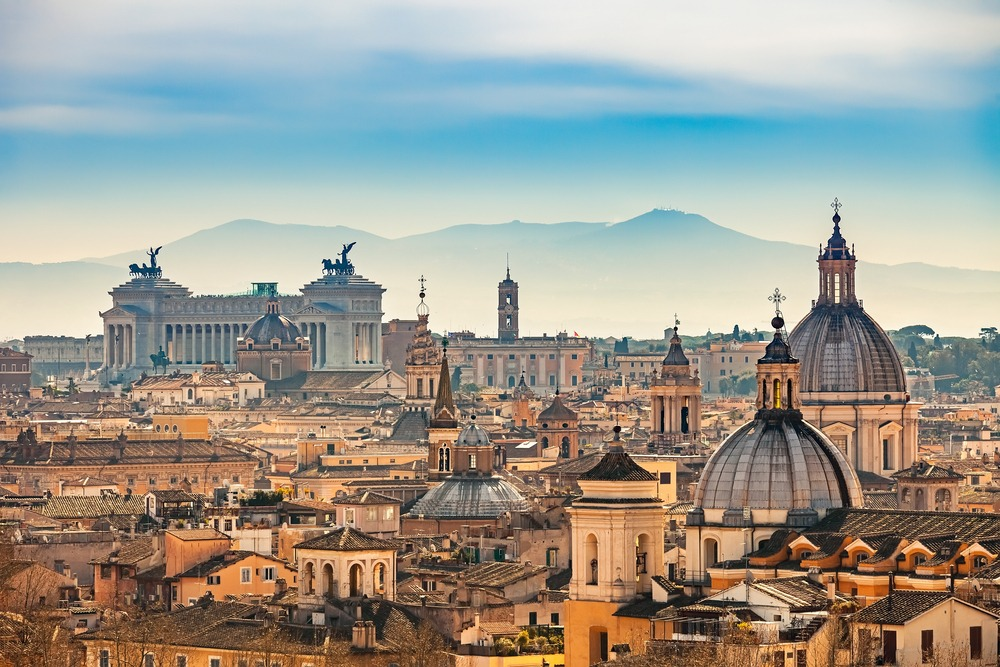

---


O [Airbnb](https://https://www.airbnb.com.br/) é uma das maiores empresas de hospedagem atualmente e o fato interessante é que a própria não detém nenhuma imóvel para locação.

A ideia de negócio dessa gigante do ramo consiste em conectar pessoas que querem hospedagens com anfitriões dispostos a alugar seus imóveis de forma bastatante prática.

NO final de 2018, a empresa de apenas 10 anos, havia hospedado mais de 300 milhões de pessoas ao redor do mundo.

Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a empresa disponibiliza dados do site para as principais cidades do mundo e torna possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

**Neste notebook, analisaremos os dados referentes à Roma e veremos qual insights podem ser extraídos a partir de dados brutos**



In [1]:
!pip install pywaffle -q

     |████████████████████████████████| 532kB 6.6MB/s 


Roma é praticamente um marco cultural da humanidade, foi a capital de um dos maiores impérios que o homem tem notícia, além disso a influência cultural e histórica dessa cidade se faz presente até hoje, principalmente na arquitetura. Além disso, a cidade em si conta com diversos pontos turísticos repletos de história, construções magníficas e bem preservadas, além da famosa culinária italiana, tornando assim a cidade um ótimo destino para viagens.

In [2]:
#importando as bibliotecas que serão usadas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
from pywaffle import Waffle


# Obtenção dos dados

Todos os dados usados neste notebook foram obtidos no site [Inside Airbnb](https://http://insideairbnb.com/get-the-data.html).

Para esta análise inicial, baixaremos o seguinte arquivo:


*   `listings.csv` - *Summary information and metrics for listings in Rome(good for visualisations).*



In [3]:
#lendo os dados
dados = pd.read_csv('/content/drive/MyDrive/DSNP/airbnb_roma.csv')


# Análise dos dados

In [4]:
print("Entradas:\t {}".format(dados.shape[0]))
print("Variáveis:\t {}\n".format(dados.shape[1]))


Entradas:	 28151
Variáveis:	 16




Na célula acima podemos ver que existem 28151 entrada no nosso dataset, ou seja, este é o número de quartos que podem ser alugados no AirBnb em Roma.

Além disso também passamos a saber que o dataset conta com 16 variáveis.

In [5]:
#descobrindo as colunas, ou seja, as variáveis
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [6]:
dados.head()


id  ... availability_365
0   2737  ...              365
1   2903  ...              365
2   3079  ...              365
3  11834  ...              364
4  12398  ...              319

[5 rows x 16 columns]

Acima pudemos ver a cara dos nossos dados analisando as 5 primeiras entradas, ou seja, 5 dos vários imóveis disponíveis para locação na cidade.

Agora vamos descobrir se há dados faltantes no nosso conjunto de dados, tal procedimento é de suma importância, pois com ele passamos a saber a integridade e a qualidade dos nossos dados.

In [7]:
#descobrir qual a porcentagem de dados faltantes em cada variável
#além disso elas serão ordenadas em ordem decrescente
(dados.isnull().sum() / dados.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.226706
last_review                       0.226706
host_name                         0.000391
name                              0.000249
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

In [8]:
#criar uma coluna com os preços em reais
dados['preços_reais'] = dados['price'] * 6.45
dados.head()

id  ... preços_reais
0   2737  ...       135.45
1   2903  ...       238.65
2   3079  ...       606.30
3  11834  ...       580.50
4  12398  ...       470.85

[5 rows x 17 columns]

* Com isso verificamos que a coluna `neighbourhood_group` possui todas as suas entradas sem informação;
* As variáveis `reviews_per_month` e `last_review` possuem cerca de 22,6% dos seus valores ausentes;
* As demais variáveis tem menos que 0,1% dos seus valores ausentes.

In [9]:
colunas_num = []
colunas_num = [colunas for colunas in dados.columns
               if dados[colunas].dtype in ['int64','float64']]

dados[colunas_num].describe()

id       host_id  ...  availability_365  preços_reais
count  2.815100e+04  2.815100e+04  ...      28151.000000  28151.000000
mean   2.260071e+07  9.425779e+07  ...        234.941174    701.158602
std    1.428754e+07  1.031285e+08  ...        138.716651   2078.710185
min    2.737000e+03  1.822000e+03  ...          0.000000      0.000000
25%    9.666016e+06  1.262781e+07  ...         92.000000    309.600000
50%    2.211527e+07  4.550341e+07  ...        295.000000    451.500000
75%    3.537806e+07  1.599660e+08  ...        363.000000    670.800000
max    4.708049e+07  3.803965e+08  ...        365.000000  68182.950000

[8 rows x 12 columns]

Acima conseguimos visualizar várias informações estatísticas bem importantes sobre as variáveis, inclusive algumas delas parecem conter outliers, ou seja, dados muito acima ou muito abaixo dos demais.

Usaremos um gráfico de baixa, boxplot, para tentar confirmar a suspeita de outliers nas colunas `price`e `minimum_nights`.

In [10]:
graf1 = go.Figure(go.Box(y = dados['minimum_nights'],
                         name = ' ',
                         marker={'color':'#31543a'})
)

graf1.update_layout(title='Boxplot do número mínimo de noites para as propriedades disponíveis em Roma no AirBnb.',
                    yaxis_title = 'Número mínimo de noites',
                    template='plotly_white')
graf1.show()

As suspeitas foram muito bem confirmadas, acima podemos ver que a ''caixa'' nem se formou direto por causa da quantidade de outliers presentes na coluna `minimum_nights`. 

Vamos descobrir quantas propriedades ditam que o mínimo de noites seja de ao menos 30.

In [11]:
print("Noites minímas: valores acima de 30:")
print("{} imóveis".format(len(dados[dados.minimum_nights > 30])))
print("{:.4f}%".format((len(dados[dados.minimum_nights > 30]) / dados.shape[0])*100))

Noites minímas: valores acima de 30:
191 imóveis
0.6785%


Percebemos que menos de 1% pede que os hospedes fiquem no mínimo 30 dias.

Tendo em vista que 30 dias é um período bastante longo, férias completas por exemplo, vamos ver quantos anfitriões pedem que a estadia mínima seja de ao menos 7 dias.



In [12]:
print("Noites minímas: valores abaixo de 7 noites:")
print("{} imóveis".format(len(dados[dados.minimum_nights < 7])))
print("{:.4f}%".format((len(dados[dados.minimum_nights < 7]) / dados.shape[0])*100))

Noites minímas: valores abaixo de 7 noites:
26808 imóveis
95.2293%


A grande maioria das locações aceitam estadia menor que uma semana, bem interessante esse fato, pois facilita para pessoas que estejam com intuito de conhecer outras cidades, estejam fazendo mochilões e afins por um preço bastante acessível.

Agora vamos descobrir se a coluna `price` também existem outliers.

In [13]:
graf1 = go.Figure(go.Box(y = dados['preços_reais'], 
                        name = ' ',
                         marker = {'color': '#16182e'}))
graf1.update_layout(title='Boxplot dos preços das propriedades disponíveis em Roma',
                    yaxis_title='Preços em reais',
                    template='plotly_white')
graf1.show()

Ficou bem claro que nesse caso também existem muitos dados fora da curva, por isso vamos descobrir quantas propriedades estão com preço acima de 700 reais a diária.

In [14]:
print('Preços acima de 700 reais:')
print("{} imóveis".format(len(dados[dados.preços_reais > 700])))
print("{:.4f}%".format((len(dados[dados.preços_reais > 700]) / dados.shape[0])*100))

Preços acima de 700 reais:
6697 imóveis
23.7896%


6697 hospedagens estão com preço acima de 700 reais, isso corresponde a cerca de 24% dos nossos dados, não seria uma boa decisão jogar fora tanta informação, por isso na etapa seguinte, onde limparemos os dados aumentaremos o limite de 700 reais para ao menos 4000 reais.

In [15]:
print('Preços acima de 4000 reais:')
print("{} imóveis".format(len(dados[dados.preços_reais > 4000])))
print("{:.4f}%".format((len(dados[dados.preços_reais > 4000]) / dados.shape[0])*100))

Preços acima de 4000 reais:
278 imóveis
0.9875%


Ao mudar nosso limite de 700 reais para 4000 reais, percebemos que apenas 278 hospedagens tem preços maiores que o valor designado e isso representa cerca de 1% dos nossos dados, o que pode ser descartado dos nossos dados sem que afete a análise.

Agora limparemos os dados, visto que foram encontrados outliers nas colunas `price` e `minimum_nights` . Além disso a coluna `neighbourhood_group`será removida, tendo em vista que não existe nenhuma informação presente na mesma.

In [16]:
dados_limpos = dados.copy()
dados_limpos.drop(dados_limpos[dados_limpos.preços_reais > 4000].index, axis=0, inplace=True)
dados_limpos.drop(dados_limpos[dados_limpos.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
dados_limpos.drop('neighbourhood_group', axis=1, inplace=True)

Agora faremos os boxplos novamente, a fim de comparar as mudanças.

In [17]:
graf1 = go.Figure(go.Box(y = dados_limpos['minimum_nights'],
                         name = ' ',
                         marker={'color':'#31543a'})
)

graf1.update_layout(title='Boxplot do número mínimo de noites para as propriedaes'
                            'disponíveis em Roma no AirBnb.',
                    yaxis_title = 'Número mínimo de noites',
                    template='plotly_white')
graf1.show()

In [18]:
graf1 = go.Figure(go.Box(y = dados_limpos['preços_reais'], 
                        name = ' ',
                        marker = {'color': '#16182e'}))
graf1.update_layout(title='Boxplot dos preços das propriedades disponíveis em Roma',
                    yaxis_title='Preços',
                    template='plotly_white')
graf1.show()

Agora a visualiação melhorou bastante, e por serem gráficos interativos é possível que a gente se atente ao fato de que a grande maioria das propriedades estimula a quantidade mínima de noites entre 1 e 3 noites.

Já na questão preço, 3 em cada 4 hospedagens tem preços abaixo de 658 reais.

Em seguida vamos observar se há corelação entre as variáveis, ou seja, se existe uma relação entre duas variáveis ou se elas se comportam de modo semelhante.

Essa relação pode ser medida e tem uma itensidade, para visualizarmos melhores essas relações usaremos um `heatmap`, ou mata de calor. Este é um ótimo recurso nesse caso, pois quanto mais "quente", ou seja, quanto maior a corelação, mais forte ou escura a cor fica.

Para chegar no mapa de calor, primeiro criaremos uma matriz de corelação.


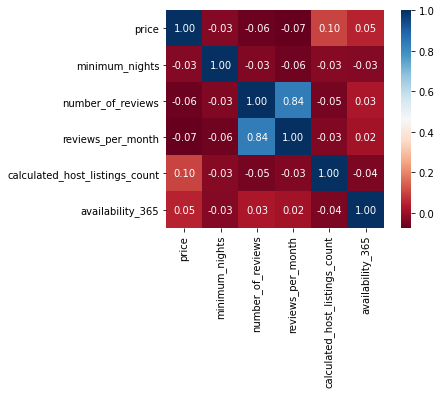

In [19]:
corr = dados_limpos[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A coluna `room_type`indica qual o tipo de locação está sendo anunciada. As locações variam desde quartos compartilhados até casas inteiras.

Tendo isso em mente vamos descobrir qual tipo de locação é a mais oferecida em Roma.

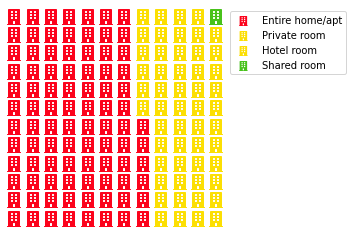

Entire home/apt    0.628296
Private room       0.318573
Hotel room         0.046197
Shared room        0.006935
Name: room_type, dtype: float64


In [20]:
tipos = dict(dados_limpos['room_type'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    rows=12,
    columns=12,
    colors=("#fc031c", "#fcdf03", "#fcdf03", "#48c21b"),
    values=tipos, icons='building', icon_size=16,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print((dados_limpos['room_type'].value_counts() / dados_limpos.shape[0]))

Nesse caso o tipo de imóvel que mais se faz presente são casas inteiras, representado cerca de 63% dos imóveis disponíveis na cidade.
Geralmente, esse tipo de acomodação conta com quarto, banheiro, cozinha e entrada separada e exclusiva.

O segundo tipo de locação mais presente é o quarto individual, representando cerca de 31,7% das locações em aberto.

Agora nosso foco será descobrir quais locais são mais caros em Roma. Os resultados dos dez bairos com maior preço são mostrado a seguir.

In [21]:
preços = dict(dados_limpos.groupby(['neighbourhood']).preços_reais.mean().sort_values(ascending=False)[:10])
preços = pd.DataFrame(list(preços.items()), columns=['Bairros', 'Média_preços'])


bar_plot3 = px.bar(preços, x='Bairros', y='Média_preços', color='Bairros', text='Média_preços')

bar_plot3.update_layout(title_text='Preços médios das locações dos bairros mais caros em Roma no Airbnb',
                        yaxis_title = 'Preços, em reais')
                        
bar_plot3.update_traces(texttemplate='%{text:.4s}', textposition='outside')
bar_plot3.show()

Mas será que é mesmo tão caro se hospedar no Centro Histórico de Roma? 

Vamos tentar descobrir se não há opções mais em conta.

In [22]:
dados_limpos['preços_reais'].loc[dados_limpos['neighbourhood']=='I Centro Storico'].describe()

count    14868.000000
mean       680.224253
std        519.466669
min          0.000000
25%        374.100000
50%        541.800000
75%        799.800000
max       3999.000000
Name: preços_reais, dtype: float64

Com isso percebemos que 1 em cada 4 imóveis no Centro Histórico fica abaixo de 374 reais, ou seja, 300 reais mais barato que a média. Agora sim encontramos um preço mais amigável.

Agora vamos descobrir quais são os 10 bairros com mais locações disponíveis na cidade.

In [23]:
bairros = dict(dados_limpos['neighbourhood'].value_counts())
bairros =  pd.DataFrame(list(bairros.items()), columns=['Bairro', 'Número_de_locações'])

bar_plot3 = px.bar(bairros, x='Bairro', y='Número_de_locações', color='Bairro', text='Número_de_locações')

bar_plot3.update_layout(title_text='Os 10 bairros mais procurados em Roma',
                        yaxis_title = 'Número de imóveis disponíveis')
                        
bar_plot3.update_traces(texttemplate='%{text:.4s}', textposition='outside')
bar_plot3.show()

É interessante notar que justamente a localidade com maior número de hospedagens oferecidas seja a que tenha a média de preços mais alta.

Provavelmente tal fato se dá por se tratar do centro histórico da cidade, o chamado I Centro Storico, onde há diversos locais históricos  e áreas para compras e referições. Entre as várias atrações históricas do bairro encontram-se, o Panteão, um templo dedicado aos deuses romanos que data do século II e é uma das construções da antiguidade mais bem preservadas de Roma.
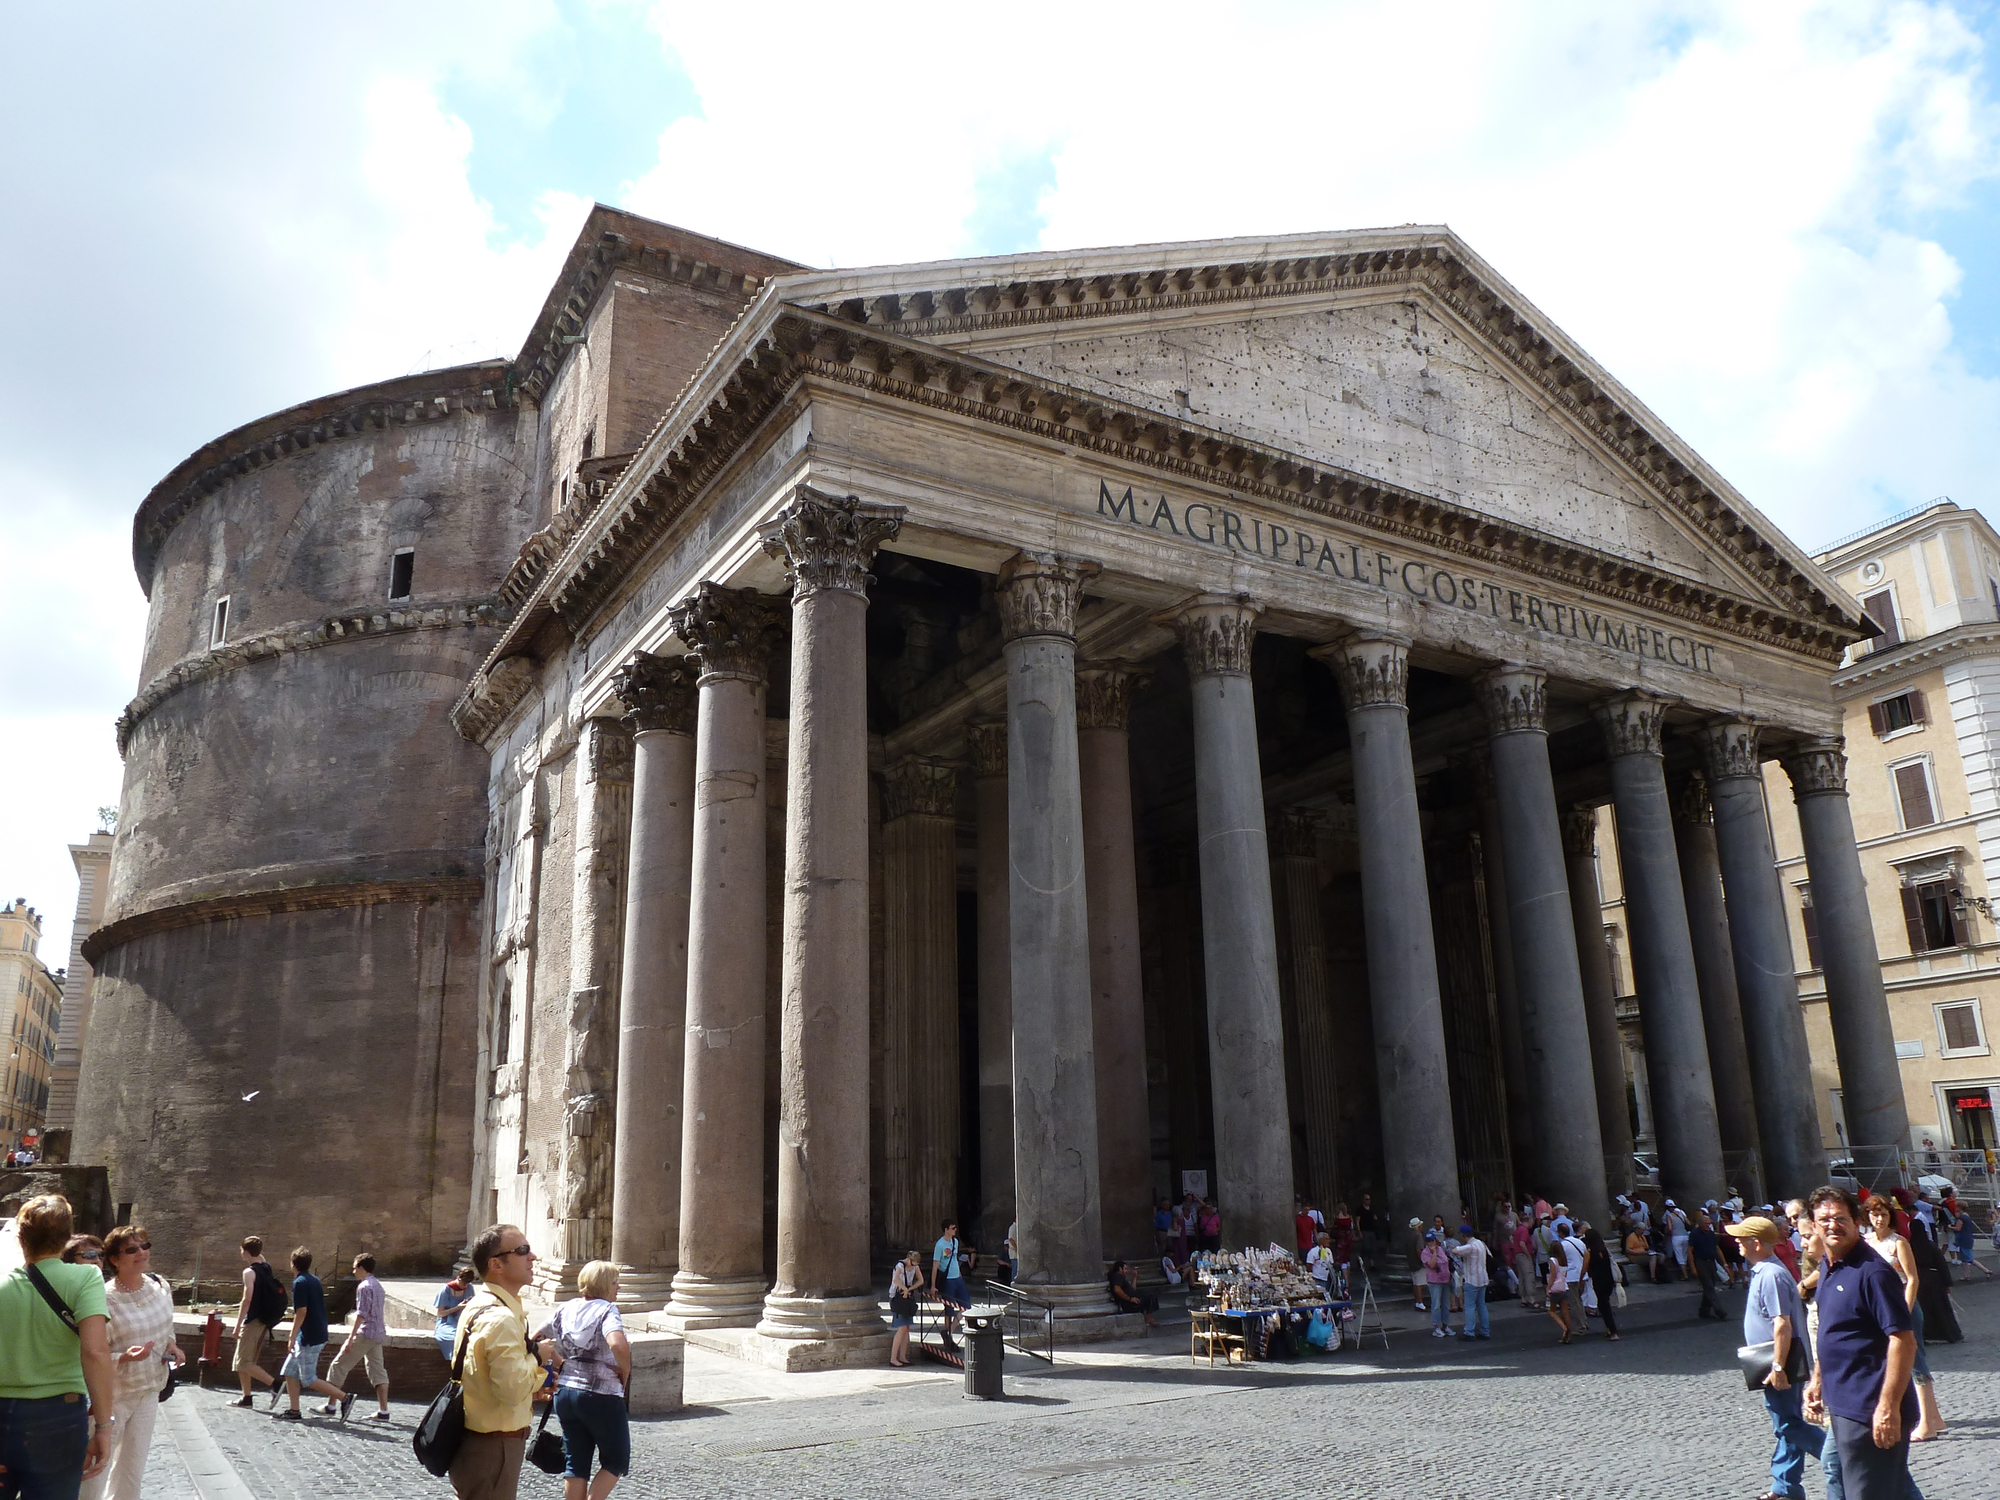